# Kids drawins recognizer

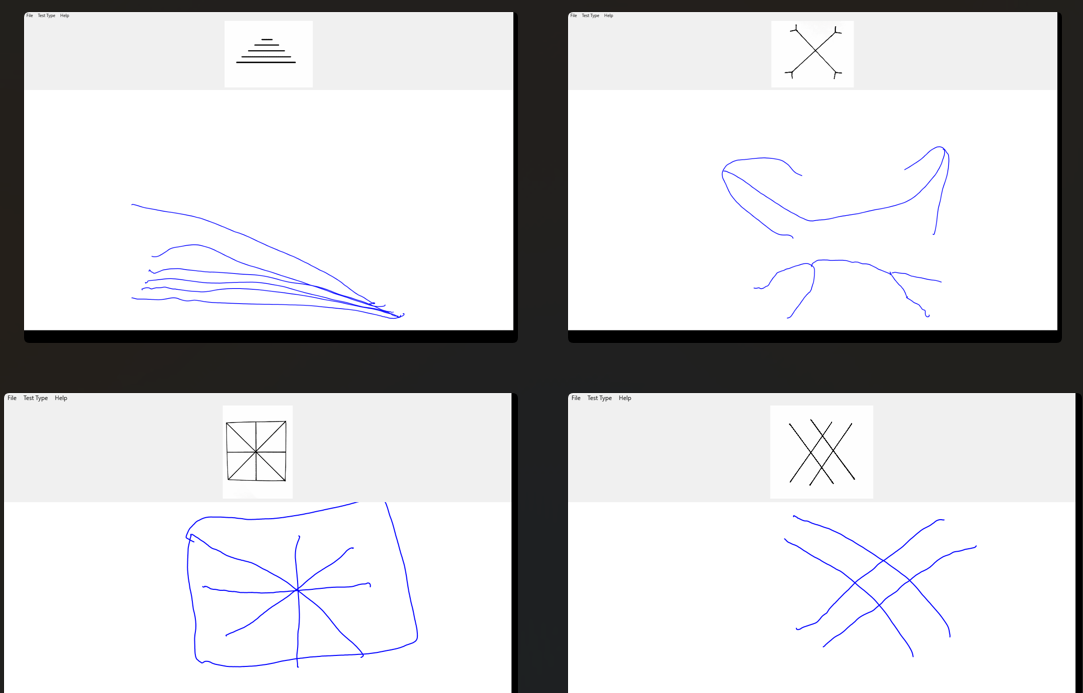

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 1. knowing and cleaning the data

In [2]:
df = pd.read_csv('./7554/SimpleTest/18.csv')
df

,X,Y,Pressure,TiltX,TiltY,Time
0,712.41113292528,550.422913,0.290761,-4617.0,2397.0,00:02.4825431
1,712.727104746506,550.580898,0.295644,-4617.0,2397.0,00:02.4981649
2,713.517034299573,550.896870,0.295644,-4617.0,2397.0,00:02.4981649
3,713.938330061208,550.949532,0.278798,-4617.0,2397.0,00:02.5137802
4,715.886822958771,550.422913,0.232654,-4617.0,2397.0,00:02.5343289
...,...,...,...,...,...,...
716,482.488971012819,497.286985,0.652827,-3769.0,1638.0,00:15.5950274
717,484.17415405936,498.024252,0.603265,-3769.0,1638.0,00:15.5950274
718,484.17415405936,498.024252,0.589837,-3769.0,1638.0,00:15.6106472
719,Time Elapsed till drawing started: 00:02.4825431,NaN,NaN,NaN,NaN,NaN


In [3]:
last_rows = df.iloc[-2:,:]
df = df.iloc[:-2,:]
print(df.columns)
dict = {'X':'X', ' Y':'Y', ' Pressure':'Pressure', ' TiltX':'TiltX', ' TiltY':'TiltY', ' Time':'Time'}
df.rename(columns=dict,inplace=True)
df.head()

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,712.41113292528,550.422913,0.290761,-4617.0,2397.0,00:02.4825431
1,712.727104746506,550.580898,0.295644,-4617.0,2397.0,00:02.4981649
2,713.517034299573,550.896870,0.295644,-4617.0,2397.0,00:02.4981649
3,713.938330061208,550.949532,0.278798,-4617.0,2397.0,00:02.5137802
4,715.886822958771,550.422913,0.232654,-4617.0,2397.0,00:02.5343289


In [4]:
df.dtypes

X            object
Y           float64
Pressure    float64
TiltX       float64
TiltY       float64
Time         object
dtype: object

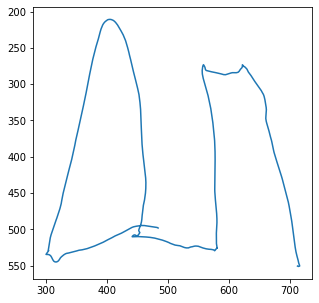

In [5]:
df['X']= df['X'].astype('float64')
df['Time'] = pd.to_datetime(df['Time'], format='%M:%S.%f')

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(df['X'],df['Y'])

## The shape was printed upside down - we will fix it:
plt.gca().invert_yaxis()

plt.show()


## 2. Producing new columns:
#### a. delta x,y - The distance of every point from the previous point.
#### b. delta time - The time difference between each point and the previous point

In [6]:
df['delta_x_y']=0.0
df['delta_time']=0.0

for i in df.index:
    q=[df['X'][i],df['Y'][i]]
    if (i==0):
        t=0.0
        p=[0,0]
    else:
        t=df['Time'][i]-df['Time'][i-1]
        p=[df['X'][i-1],df['Y'][i-1]]
    
    df['delta_x_y'][i]=math.dist(p, q)
    df['delta_time'][i]=t
df['delta_x_y'][0]=0.0

df

,X,Y,Pressure,TiltX,TiltY,Time,delta_x_y,delta_time
0,712.411133,550.422913,0.290761,-4617.0,2397.0,1900-01-01 00:00:02.482543100,0.000000,0.0
1,712.727105,550.580898,0.295644,-4617.0,2397.0,1900-01-01 00:00:02.498164900,0.353267,0 days 00:00:00.015621800
2,713.517034,550.896870,0.295644,-4617.0,2397.0,1900-01-01 00:00:02.498164900,0.850780,0 days 00:00:00
3,713.938330,550.949532,0.278798,-4617.0,2397.0,1900-01-01 00:00:02.513780200,0.424574,0 days 00:00:00.015615300
4,715.886823,550.422913,0.232654,-4617.0,2397.0,1900-01-01 00:00:02.534328900,2.018404,0 days 00:00:00.020548700
...,...,...,...,...,...,...,...,...
714,479.855873,496.813027,0.681147,-3819.0,1666.0,1900-01-01 00:00:15.579401800,2.641511,0 days 00:00:00.031248100
715,482.015013,497.181661,0.660395,-3769.0,1638.0,1900-01-01 00:00:15.579401800,2.190383,0 days 00:00:00
716,482.488971,497.286985,0.652827,-3769.0,1638.0,1900-01-01 00:00:15.595027400,0.485519,0 days 00:00:00.015625600
717,484.174154,498.024252,0.603265,-3769.0,1638.0,1900-01-01 00:00:15.595027400,1.839404,0 days 00:00:00


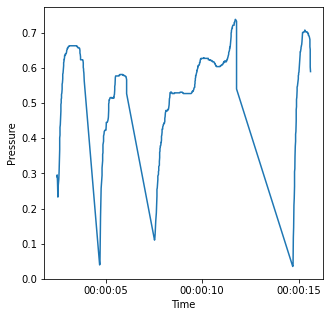

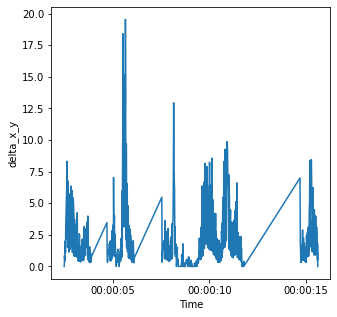

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(df['Time'],df['Pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
plt.show()

fig, ax2 = plt.subplots(figsize=(5,5))
plt.plot(df['Time'],df['delta_x_y'])
ax2.set_xlabel('Time')
ax2.set_ylabel('delta_x_y')
plt.show()

In [8]:
std_x_y = df['delta_x_y'].std()
std_pressure = df['Pressure'].std()

count_min_pressure=0
count_max_delta_x_y=0
min_pressure_point=[]
max_delta_x_y_point=[]

rows= df.shape[0]-1
print("number rows:" ,rows)
for i in range(1,rows):
    if ((df['Pressure'][i]<df['Pressure'][i-1]) & (df['Pressure'][i]<df['Pressure'][i+1])):
        i=i+1
        count_min_pressure+=1
        min_pressure_point.append(i-1)
        
for j in range(1,rows):
    if ((df['delta_x_y'][j]>df['delta_x_y'][j-1]) & (df['delta_x_y'][j]>df['delta_x_y'][j+1])):
        j=j+1
        count_max_delta_x_y+=1
        max_delta_x_y_point.append(j-1)
        
print("number of min_pressure_point:", count_min_pressure-1,)

print("number of max_delta_x_y_point:", count_max_delta_x_y-1)

intersection = [value for value in min_pressure_point if value in max_delta_x_y_point]
print("intersection:", intersection)
print("\nnumber of hand raising:", len(intersection))

number rows: 718
number of min_pressure_point: 4
number of max_delta_x_y_point: 243
intersection: [4, 132, 259, 639]

number of hand raising: 4


## 2. find amount of lines

In [9]:
def slope(x1, y1, x2, y2):
    return (float)(y2-y1)/(x2-x1)

df['slope']=0.0
for i in range(df.shape[0]):
    if (i==0):
        sl=0
    else:
        if ((df['X'][i]-(df['X'][i-1])==0)):
            sl=0
        else:
            sl = slope(df['X'][i-1],df['Y'][i-1],df['X'][i],df['Y'][i])
    df['slope'][i]=sl
    
#delta_slope=[]
#for i in range(0,df.shape[0]//10*10,10):
#    sum_delta=0.0
#    for j in range(10):
#        sum_delta+=df['slope'][i+j]
#    delta_slope.append(sum_delta)
    
#fix, ax5= plt.subplots(figsize=(5,5))
#plt.plot(delta_slope)
#plt.show()

In [10]:
slopes = []
i=0
jumps=20
print(df.shape[0])
while (i< df.shape[0]):
    new_mean=0
    j=0
    while((j<jumps) & (i+j<df.shape[0])):
        new_mean+=df['slope'][i+j]
        j+=1
    slopes.append(new_mean)
    i+=jumps

719


In [11]:
#sns.lineplot(x="Time", y="delta_slope",data=df)

In [12]:
#sns.distplot(df['delta_slope'])

In [13]:
def count_lines(df):
    counter = intersection #We assume that each hand raising is the creation of a new line
    

def mean_slope_of_k_next(start_from,k):
    new_df_rest_of_lines = df.iloc[start_from:,:]
    sum_slopes_k_next=0
    for i in range(k):
        sum_slopes_k_next += new_df_rest_of_lines['slope'][i]
    mean_slope_of_k_next = sum_slopes_k_next/k
    
    return mean_slope_of_k_next



In [14]:
def distance(x1,x2,y1,y2):
    answer = math.sqrt(math.pow((y2-y1),2) + math.pow((x2-x1),2))
    return answer

def is_change_line(df, start_from, end, epsilon):
    jumps = end-start_from
    
    x1 = df['X'][start_from]
    x_jumps = df['X'][end]
    y1 = df['Y'][start_from]
    y_jumps = df['Y'][end]
    
    interval = distance(x1, x_jumps ,y1, y_jumps)
    
    sub_intervals=0.0
    for i in range(jumps):
        sub_intervals+= distance(df['X'][start_from+i], df['X'][start_from+i+1], df['Y'][start_from+i], df['Y'][start_from+i+1])
    #print("interval:",interval,"\nsub_intervals",sub_intervals)
    
    if(sub_intervals <= interval*epsilon):
            return 0
    else: return 1

def count_lines(jumps,epsilon):
    lines = 0
    sets = df.shape[0]//jumps*jumps
    for i in range(0, sets, jumps):
        lines+= is_change_line(df, i, i+jumps, epsilon)
    if((lines==0) & (df.X.sum()!=0)):
        lines=1
    return lines


In [15]:
#print(is_change_line(df, 310, 330, 1.05))

In [16]:
print(count_lines(15,1.05))

11
